In [14]:
import pandas as np
data=np.read_csv("/content/USA_cars_datasets.csv")
print(data)

      Unnamed: 0  price      brand    model  year   title_status  mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle   274117   
1              1   2899       ford       se  2011  clean vehicle   190552   
2              2   5350      dodge      mpv  2018  clean vehicle    39590   
3              3  25000       ford     door  2014  clean vehicle    64146   
4              4  27700  chevrolet     1500  2018  clean vehicle     6654   
...          ...    ...        ...      ...   ...            ...      ...   
2494        2494   7800     nissan    versa  2019  clean vehicle    23609   
2495        2495   9200     nissan    versa  2018  clean vehicle    34553   
2496        2496   9200     nissan    versa  2018  clean vehicle    31594   
2497        2497   9200     nissan    versa  2018  clean vehicle    32557   
2498        2498   9200     nissan    versa  2018  clean vehicle    31371   

       color                  vin        lot       state country  \
0      

In [3]:
data.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["brand"]=b.fit_transform(data["brand"])
data["model"]=b.fit_transform(data["model"])
data["title_status"]=b.fit_transform(data["title_status"])
data["color"]=b.fit_transform(data["color"])
data["vin"]=b.fit_transform(data["vin"])
data["state"]=b.fit_transform(data["state"])
data["country"]=b.fit_transform(data["country"])
data["condition"]=b.fit_transform(data["condition"])


In [16]:
print(data)

      Unnamed: 0  price  brand  model  year  title_status  mileage  color  \
0              0   6300     27     25  2008             0   274117      2   
1              1   2899      8     92  2011             0   190552     39   
2              2   5350      7     75  2018             0    39590     39   
3              3  25000      8     32  2014             0    64146      4   
4              4  27700      5      0  2018             0     6654     34   
...          ...    ...    ...    ...   ...           ...      ...    ...   
2494        2494   7800     24    120  2019             0    23609     34   
2495        2495   9200     24    120  2018             0    34553     39   
2496        2496   9200     24    120  2018             0    31594     39   
2497        2497   9200     24    120  2018             0    32557      2   
2498        2498   9200     24    120  2018             0    31371     39   

       vin        lot  state  country  condition  
0     2392  159348797   

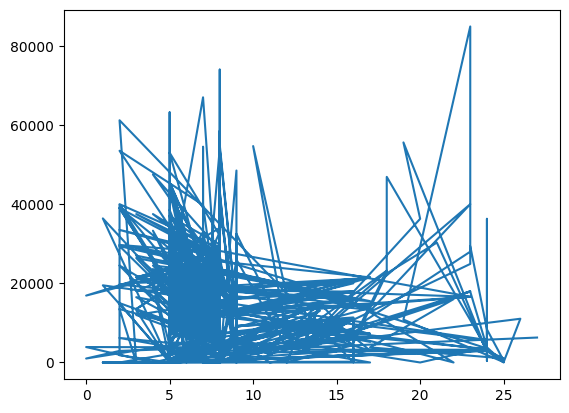

In [6]:
from matplotlib import pyplot as plt
plt.plot(data["brand"],data["price"])

In [17]:
x=data.drop("title_status",axis=1)
y=data["title_status"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)
print(xtrain)
print(ytrain)

      Unnamed: 0  price  brand  model  year  mileage  color   vin        lot  \
342          342   6680     11     23  2011        1     15  2310  167266214   
2485        2485  13900     24     91  2018    41539      2  2419  167762214   
2321        2321  12000     24     91  2020    11583      4  2380  167656206   
326          326  14810     14     75  2019    32611      6  2386  167698673   
341          341   5600      9     75  2017    59808      2  1794  167703323   
...          ...    ...    ...    ...   ...      ...    ...   ...        ...   
1962        1962  24300      8    122  2019    29305     46   310  167615308   
515          515   3820     24     75  2016    41654      4  2260  167692784   
336          336  26900      5    113  2018    42941      2  1253  167781794   
205          205  12990      8     32  2017   126523     46   584  167656527   
2399        2399  10300     24     94  2018    41203     15  2170  167615924   

      state  country  condition  
342  

In [18]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
data=br.predict([[2499,7,117,2016,1,54327,50,1044,123456789,5,1,33]])
print(data)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[461   3]
 [ 11  25]]


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.972


In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       464
           1       0.89      0.69      0.78        36

    accuracy                           0.97       500
   macro avg       0.93      0.84      0.88       500
weighted avg       0.97      0.97      0.97       500

